# Non-Linear Classification

This exercise demonstrates classification with the following key steps:

- **Data Splitting** (Training and Testing Sets)
- **Simple Model Class** (Defining the Classification Model)
    - Add hidden layer
    - Add ReLU activation
    - `BCEWithLogitsLoss()` for loss function
- **Training Loop** (Training the Model)
- **Graphing** (Visualizing Training and Losses and Boundary)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import numpy as np

## Data Generator

In [2]:
n_samples = 1000
X0, y0 = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
X0[:10], y0[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
# Check the shape and type of X and y
print("X shape:", X0.shape)
print("X type:", type(X0))
print("y shape:", y0.shape)
print("y type:", type(y0))

X shape: (1000, 2)
X type: <class 'numpy.ndarray'>
y shape: (1000,)
y type: <class 'numpy.ndarray'>


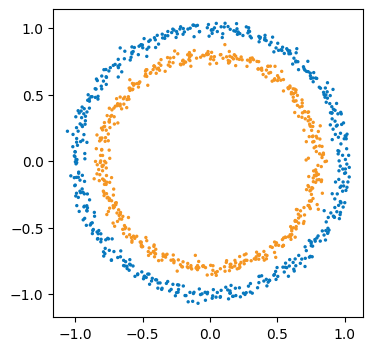

In [5]:
# Plot Color scheme

color1 = (8/255, 120/255, 190/255) # cool blue
color2 = (245/255, 150/255, 35/255) # warm orange
color3 = (34/255, 153/255, 84/255) # fresh green
color4 = (255/255, 182/255, 193/255) # Pastel pink
color5 = (180/255, 180/255, 180/255) # Light Grey
# Create a custom colormap using these colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [color1, color3, color2])

plt.figure(figsize=(4, 4))
plt.scatter(x=X0[:, 0], # The x-coordinates of the points are taken from the first column of X
        y=X0[:, 1], # The y-coordinates of the points are taken from the second column of X
           c=y0, # Color of each point will depend on the corresponding value in y
           cmap=custom_cmap,
           s=2)

In [6]:
# Turn data into tensors
X = torch.from_numpy(X0).type(torch.float)
y = torch.from_numpy(y0).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Model Architecture

In [7]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
    
    def forward(self, x):
        # We put relu activation between layes
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x
            

### Model Initialization

In [15]:
# Model initialization
model = CircleModel()

# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.21)

print(model)

CircleModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


### Training Process

In [16]:
num_epochs = 1000
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    logit = model(X_train)
    preds = torch.round(torch.sigmoid(logit))

    # Calculate Loss
    loss = loss_fn(logit.squeeze(), y_train)
    train_losses.append(loss.item())

    # Optimizer zero gradient
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimizer step
    optimizer.step()

    # TESTING
    model.eval()

    with torch.inference_mode():
        test_logit = model(X_test)
        test_preds = torch.round(torch.sigmoid(test_logit))
        test_loss = loss_fn(test_logit.squeeze(), y_test)
        test_losses.append(test_loss.item())

    if epoch % 25 == 0:
        print(f'Epoch: [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch: [1/1000], Loss: 0.7027
Epoch: [26/1000], Loss: 0.6915
Epoch: [51/1000], Loss: 0.6902
Epoch: [76/1000], Loss: 0.6887
Epoch: [101/1000], Loss: 0.6871
Epoch: [126/1000], Loss: 0.6852
Epoch: [151/1000], Loss: 0.6829
Epoch: [176/1000], Loss: 0.6800
Epoch: [201/1000], Loss: 0.6763
Epoch: [226/1000], Loss: 0.6716
Epoch: [251/1000], Loss: 0.6654
Epoch: [276/1000], Loss: 0.6569
Epoch: [301/1000], Loss: 0.6450
Epoch: [326/1000], Loss: 0.6284
Epoch: [351/1000], Loss: 0.6049
Epoch: [376/1000], Loss: 0.5713
Epoch: [401/1000], Loss: 0.5248
Epoch: [426/1000], Loss: 0.4651
Epoch: [451/1000], Loss: 0.3919
Epoch: [476/1000], Loss: 0.4783
Epoch: [501/1000], Loss: 0.4281
Epoch: [526/1000], Loss: 0.3960
Epoch: [551/1000], Loss: 0.3298
Epoch: [576/1000], Loss: 0.2831
Epoch: [601/1000], Loss: 0.2208
Epoch: [626/1000], Loss: 0.1590
Epoch: [651/1000], Loss: 0.0956
Epoch: [676/1000], Loss: 0.0778
Epoch: [701/1000], Loss: 0.0649
Epoch: [726/1000], Loss: 0.0551
Epoch: [751/1000], Loss: 0.0474
Epoch: [776/1

## Result Visualization

### Training vs Losses

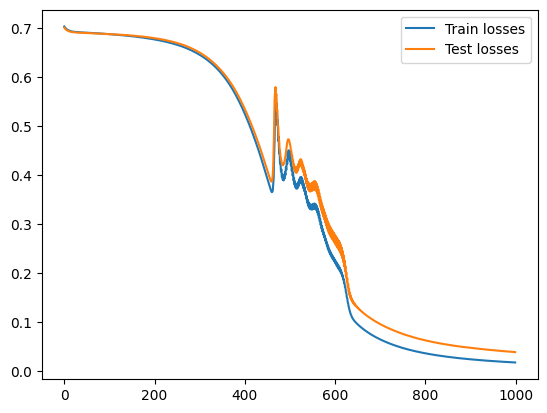

In [17]:
# Plot Train losses vs test losses
plt.plot(range(num_epochs), train_losses, label='Train losses')
plt.plot(range(num_epochs), test_losses, label='Test losses')
plt.legend()

### Boundary plot

In [18]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source 1 - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    Source 2 - https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
    """

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.figure(figsize=(5, 5))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=2, cmap=custom_cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

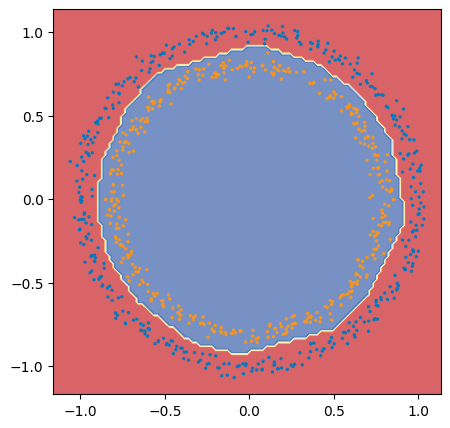

In [12]:
plot_decision_boundary(model=model, X=X_train, y=y_train)